# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [3]:
import numpy as np
from matplotlib import pyplot as pl

import tensorflow as tf
from tensorflow import keras as keras
from sklearn import metrics as me

%matplotlib inline

2022-04-26 15:54:53.847863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-26 15:54:53.847887: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Using raw data to train a MLP
### First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


### Create the MLP (sequential API)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_shape=(784,), activation='relu'))
#model.add(Dropout(0.5))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


2022-04-26 15:57:03.711089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-26 15:57:03.711120: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-26 15:57:03.711146: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hector-pc): /proc/driver/nvidia/version does not exist


### Define some constants and train the MLP

In [6]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1643 - accuracy: 0.7283 - val_loss: 0.6277 - val_accuracy: 0.8590
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5406 - accuracy: 0.8680 - val_loss: 0.4445 - val_accuracy: 0.8890
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4300 - accuracy: 0.8865 - val_loss: 0.3820 - val_accuracy: 0.8989
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3812 - accuracy: 0.8961 - val_loss: 0.3468 - val_accuracy: 0.9041
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.9030 - val_loss: 0.3241 - val_accuracy: 0.9097
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.9084 - val_loss: 0.3092 - val_accuracy: 0.9137
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.9122 - val_loss: 0.2961 - val_accuracy: 0.9168
Epoch 

### Show the performance of the model

Test score: 0.2669932246208191
Test accuracy: 0.9251000285148621


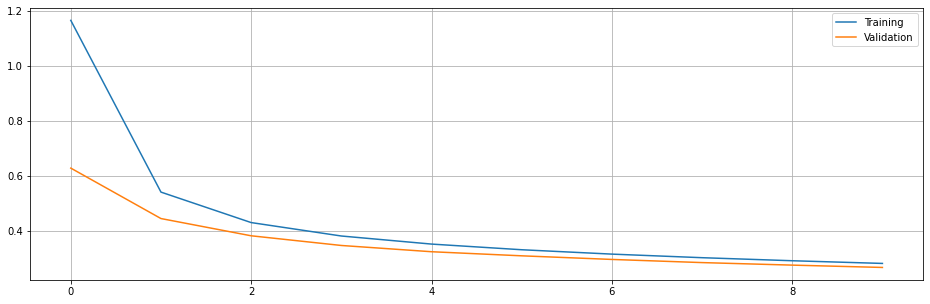

In [9]:
pl.figure(figsize=(16,5))
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Validation')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

### Confusion matrix

In [10]:
pred = np.argmax(model.predict(X_test), axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 958,    0,    2,    1,    1,    3,   10,    1,    4,    0],
       [   0, 1111,    3,    2,    1,    2,    4,    2,   10,    0],
       [   9,    4,  922,   18,   15,    0,   11,   14,   34,    5],
       [   2,    0,   16,  936,    0,   22,    2,    9,   15,    8],
       [   1,    3,    3,    1,  915,    0,    9,    2,    5,   43],
       [   9,    3,    3,   39,    7,  780,   16,    4,   23,    8],
       [  14,    3,    3,    2,   16,   14,  903,    1,    2,    0],
       [   3,    8,   24,    8,    6,    0,    0,  944,    5,   30],
       [   7,    7,    6,   30,    7,   16,   11,   12,  869,    9],
       [   9,    8,    1,   11,   35,    8,    1,   16,    7,  913]])